Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#reading csv file
train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

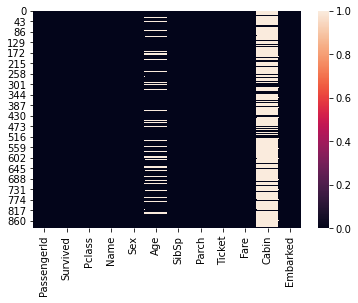

In [7]:
#lets create heatmat for visualizing missing values

sns.heatmap(train.isnull())

We can see that 'Cabin' column has a lot of data missing. We have treat this model

<AxesSubplot:xlabel='Survived', ylabel='count'>

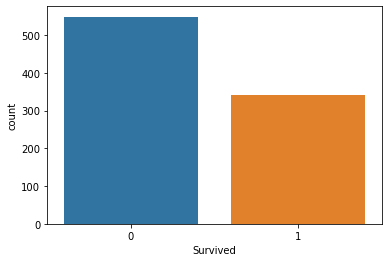

In [8]:
#lets visualize the number of survived passengers using count plot
sns.countplot(x='Survived',data=train)

In [9]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

549 passengers lost their life and 342 passengers survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

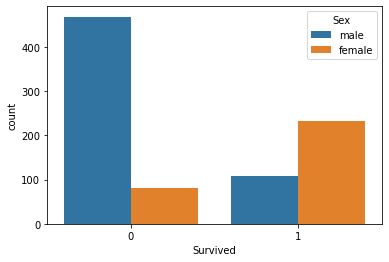

In [10]:
#lets analyse this with respect to sex column
sns.countplot(x='Survived',hue='Sex',data=train)

more male passengers lost their lives and more female passengers survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

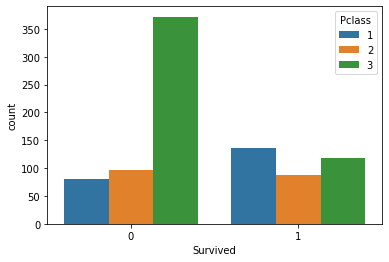

In [11]:
#lets analyse this with respect to 'Pclass' column
sns.countplot(x='Survived',hue='Pclass',data=train)

most of the Pclass = 3 paseengers lost their lives

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

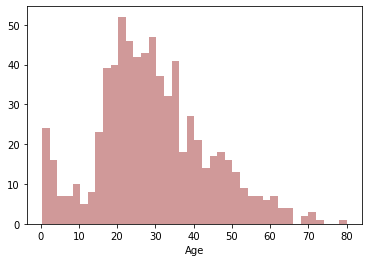

In [12]:
#lets plot distribution plot for 'Age' column
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

Most of the paseengers were between age group 15 to 45

<AxesSubplot:xlabel='SibSp', ylabel='count'>

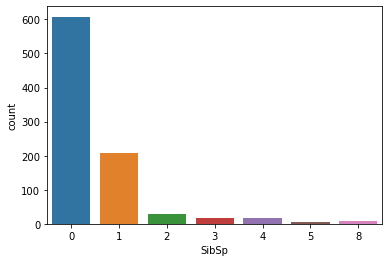

In [13]:
#lest plot countplot for number of siblings
sns.countplot(x='SibSp',data=train)

most of the passengers have 0 siblings or only 1 sibling

<AxesSubplot:>

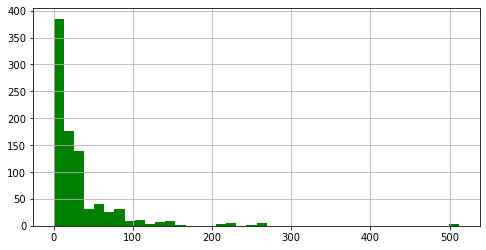

In [14]:
#lets plot histgram for 'Fare' column

train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). We can check the average age by passenger class.

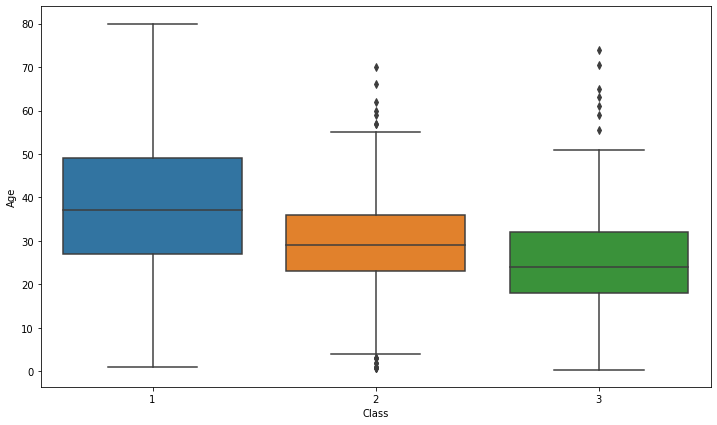

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)
plt.xlabel("Class")
plt.ylabel('Age')
plt.show()

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [16]:
#lest define a function for imputation with average values
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [17]:
#lets apply this function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

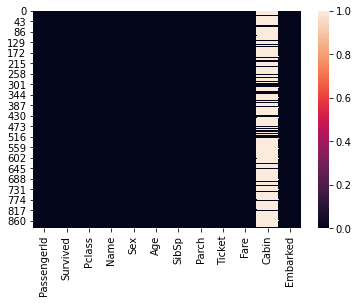

In [18]:
#lets check again the heatmap
sns.heatmap(train.isnull())

In [19]:
# lets drop the Cabin column and the row in Embarked that is NaN.
train.drop('Cabin',axis=1,inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
train.dropna(inplace=True)

In [22]:
#lets check if there are any missing values
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

So, our dataframe dont have any null values now.

# Converting Categorical Features

In [23]:
#lets check the datatypes of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


columns 'Name','Sex','Ticket'and 'Embarked' are of object datatype. We need to convert into dummy variables

In [24]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [26]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [28]:
train = pd.concat([train,sex,embark],axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building Model

In [30]:
#Train Test Split
x=train.drop('Survived',axis=1)
y=train['Survived']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [32]:
#training Logistic regression model
LR=LogisticRegression() # This is used to classify
LR.fit(x_train,y_train)
acc=LR.score(x_test,y_test)
#cross_validation
score=cross_val_score(LR,x,y,cv=3)
cv_score=np.mean(score)

print("Accuracy= ",acc)
print("CV score=",cv_score)

Accuracy=  0.7982062780269058
CV score= 0.7829268662601997


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [34]:
#lets check the confusion matrix and accuracy score
predict = LR.predict(x_test)
conf_mat=confusion_matrix(y_test,predict)
accuracy=accuracy_score(y_test,predict)
print(conf_mat)
print(accuracy)

print(classification_report(y_test,predict))

[[120  21]
 [ 24  58]]
0.7982062780269058


In [35]:
#lets try for Decison tree classifier

DT=DecisionTreeClassifier() # This is used to classify
DT.fit(x_train,y_train)
acc=DT.score(x_test,y_test)
#cross_validation
score=cross_val_score(DT,x,y,cv=3)
cv_score=np.mean(score)

print("Accuracy= ",acc)
print("CV score=",cv_score)

Accuracy=  0.757847533632287
CV score= 0.6659500409500408


In [ ]:
#lets check the confusion matrix and accuracy score
predict = DT.predict(x_test)
conf_mat=confusion_matrix(y_test,predict)
accuracy=accuracy_score(y_test,predict)
print(conf_mat)
print(accuracy)
print(classification_report(y_test,predict))

In [ ]:
#lets use RandomForestClassifier
RF=RandomForestClassifier() # This is used to classify
RF.fit(x_train,y_train)
acc=RF.score(x_test,y_test)
#cross_validation
score=cross_val_score(RF,x,y,cv=3)
cv_score=np.mean(score)

print("Accuracy= ",acc)
print("CV score=",cv_score)

In [ ]:
For random forest classifier, Accuracy = 0.80 and Cv score=0.82

In [ ]:
#lets check the confusion matrix and accuracy score
predict = RF.predict(x_test)
conf_mat=confusion_matrix(y_test,predict)
accuracy=accuracy_score(y_test,predict)
print(conf_mat)
print(accuracy)
print(classification_report(y_test,predict))

In [ ]:
xgb1=xgb.XGBClassifier() # This is used to classify
xgb1.fit(x_train,y_train)
acc=xgb1.score(x_test,y_test)
#cross_validation
score=cross_val_score(xgb1,x,y,cv=3)
cv_score=np.mean(score)

print("Accuracy= ",acc)
print("CV score=",cv_score)

In [ ]:
#lets check the confusion matrix and accuracy score
predict = xgb1.predict(x_test)
conf_mat=confusion_matrix(y_test,predict)
accuracy=accuracy_score(y_test,predict)
print(conf_mat)
print(accuracy)
print(classification_report(y_test,predict))

# Hyperparameter Tuning

In [38]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [39]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf=RandomForestClassifier()

In [41]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [42]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [44]:
rf_random.best_score_

-0.16214790708113566

In [46]:
predictions=rf_random.predict(x_test)

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.19730941704035873
MSE: 0.19730941704035873
RMSE: 0.44419524653057546


In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.show()

# Model saving

In [ ]:
import pickle
filename='Titanic project'
pickle.dump(model,open(filename,'wb'))